In [1]:
print('hello world')

hello world


In [2]:
1+3

4

# Lecture 4

In [3]:
for number in [1,2,3]:
    print(number)

1
2
3


In [5]:
print('1+2 is {}'.format(3))

1+2 is 3


# preparations
-write the database connnection info into a seperate ini file
-install the python librar based on the databases you are using
    -pandas: data manipulation 

In [8]:
!pip install psycopg2

In [9]:
import pandas
import configparser
import psycopg2

In [10]:

config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [44]:
cur=conn.cursor()

In [5]:
sql_statement = """ select bathroom,bedroom
            from public.house_price_full
            where bathroom>2"""

In [6]:
cur.execute(sql_statement)

In [7]:
cur.fetchone()

(3, 4)

In [15]:
for bathroom,bedroom in cur.fetchall()[:10]:
    print(bathroom,bedroom)

3 4
3 5
3 4
3 4
3 3
3 5
4 5
3 4
3 4
3 4


In [18]:
df=pandas.read_sql_query(sql_statement,conn)
df[:10]

,bathroom,bedroom
0,3,4
1,3,4
2,3,5
3,3,4
4,3,4
5,3,3
6,3,5
7,4,5
8,3,4
9,3,4


In [23]:
sql_statement= """
                select built_in,
                avg(price) as avg_price
                from public.house_price_full
                group by built_in
                order by built_in
                """

In [25]:
df_price= pandas.read_sql_query(sql_statement,conn)
df_price[:]

,built_in,avg_price
0,1800,3.490000e+05
1,1804,7.950000e+05
2,1809,3.380000e+05
3,1822,8.249000e+05
4,1823,4.250000e+05
...,...,...
105,2014,1.293000e+06
106,2015,2.946750e+05
107,2016,3.581122e+05
108,2017,2.354982e+05


<AxesSubplot:xlabel='built_in'>

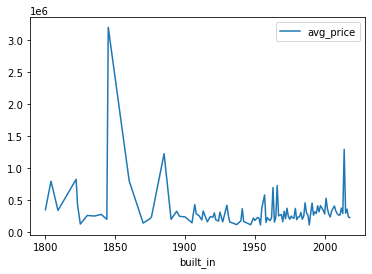

In [26]:
df_price=pandas.read_sql_query(sql_statement,conn)

df_price.plot(y='avg_price',x='built_in')

In [27]:
sql_statement= """
select area, price 
from public.house_price_full
"""

<AxesSubplot:>

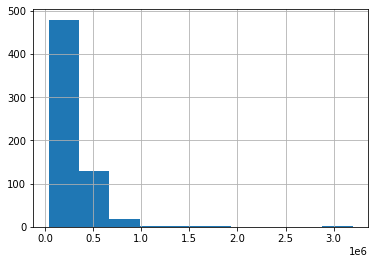

In [29]:
df_price=pandas.read_sql_query(sql_statement,conn)

df_price['price'].hist()

# Scatter Plot

In [11]:
sql_statement= """
                select price,area
                from public.house_price_full
                """

<AxesSubplot:xlabel='area', ylabel='price'>

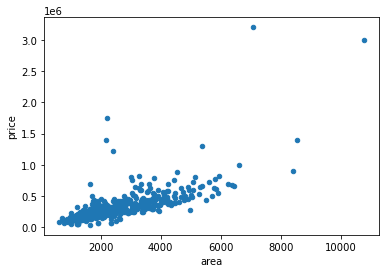

In [12]:
df_price=pandas.read_sql_query(sql_statement,conn)

df_price.plot.scatter(x='area',y='price')

# Bart Chart

In [13]:
sql_statement= """
                select house_type,
                avg(price) as avg_price
                from public.house_price_full
                group by house_type
                order by avg_price desc
                """

<AxesSubplot:xlabel='house_type'>

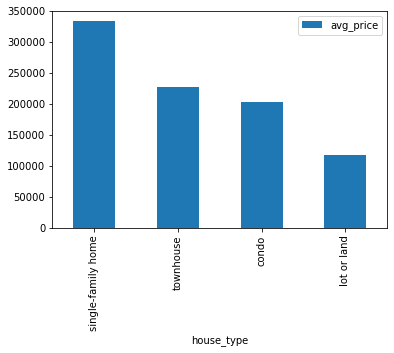

In [14]:
df_price=pandas.read_sql_query(sql_statement,conn)

df_price.plot.bar(x='house_type',y='avg_price')

# Modifying table

In [51]:
sql_statement = """
                delete from gp5.student
                where student_email = 's6@jmu.edu'
                                
                """

In [52]:
cur.execute(sql_statement)

In [50]:
conn.rollback()


In [53]:
conn.commit()

In [54]:
df_student=pandas.read_sql_query('select * from gp5.student',conn)
df_student[:]


,student_email,student_name,major
0,tomlinen@dukes.jmu.edu,Elijah Tomlin,IA
1,s2@dukes.jmu.edu,student2,IA
2,s3@dukes.jmu.edu,student3,IA
3,s1@dukes.jmu.edu,student1,IA
